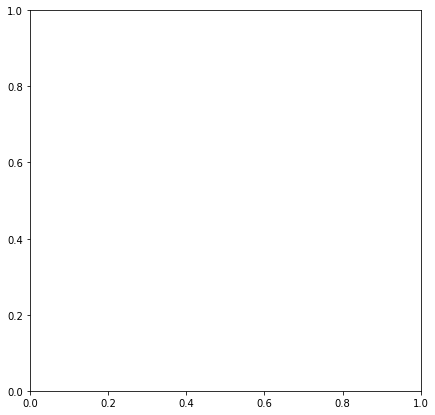

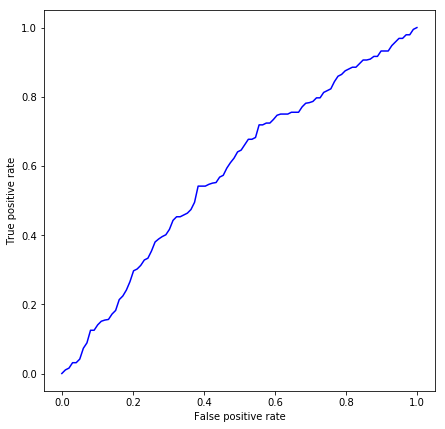

Ares under curve is 0.579519149832


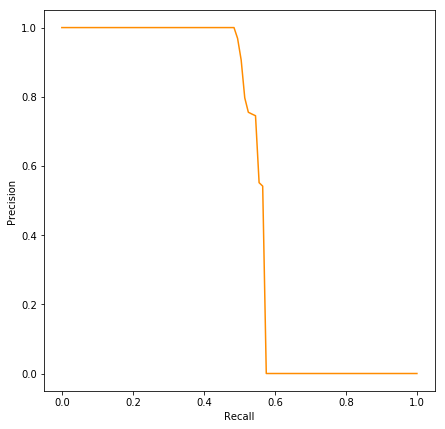

average precision score is 0.545440574495
Precision for 50% threshold is 0.561497326203


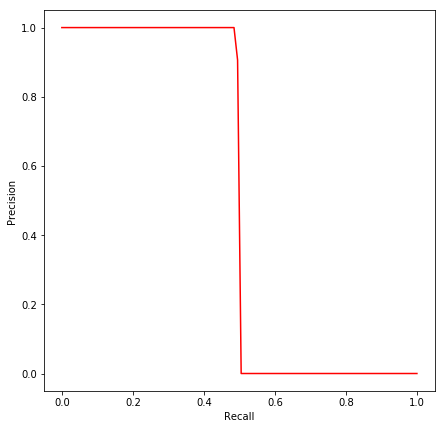

average precision score is 0.482159133887
Precision for 50% threshold is 0.505376344086


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import interp

# open dfs
bact_f = pd.read_table('proteobacteria-f_fitch-UPGMA.txt')
bact_g = pd.read_table('proteobacteria-g_fitch-UPGMA.txt')
fun = pd.read_table('fungi_fitch-UPGMA.txt')
euk = pd.read_table('eukaryota_fitch-UPGMA.txt')
archaea = pd.read_table('archaea_fitch-UPGMA.txt')

train = bact_g
test = bact_f


# Create a list of the feature column's names
features = train.columns[1:-1]

X_train = train[features].as_matrix()
X_test = test[features].as_matrix()

y_train = train['division'] == 'fitch'
y_test = test['division'] == 'fitch'
#random "prediction"

y_rand = np.random.uniform(low=0.000, high=1.000, size=test.shape[0], )


# Create a random forest Classifier
clf = RandomForestClassifier(n_estimators = 1000)


mean_fpr = np.linspace(0, 1, 100)

# Train the Classifier to take the training features and learn how they relate to the training y (the species)
classifier = clf.fit(X_train, y_train)
predictions = pd.DataFrame(data = classifier.predict_proba(X_test))
predictions = predictions[1]


preds = clf.predict(X_test)
test['preds'] = preds
#data for roc-curve
fpr, tpr, _ = roc_curve(y_test, predictions)
tpr = interp(mean_fpr, fpr, tpr)
#data for precision-recall curve
precision, recall, threshold = precision_recall_curve(y_test, predictions, )
#precision for 50% rule
idx = np.abs(threshold - 0.5).argmin()
precision_fifty_percent = precision[idx]
#interpolation
precision = interp(mean_fpr, precision, recall)

plt.figure(figsize=(7,7))
plt.plot(mean_fpr, tpr, color='blue')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
print("Ares under curve is " + str(roc_auc_score(y_test, predictions)))

plt.figure(figsize=(7,7))
plt.plot(mean_fpr,precision, color = 'darkorange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
print("average precision score is " + str(average_precision_score(y_test, predictions)))
print("Precision for 50% threshold is " + str(precision_fifty_percent))

#now the random choice precision-recall curve
y_rand = np.array(y_rand)
y_test = np.array(y_test)
precision_rand, recall_rand, thresholds_rand = precision_recall_curve(y_test, y_rand)
#50% rule
idx = np.abs(thresholds_rand - 0.5).argmin()
precision_fifty_percent = precision_rand[idx]
#interpolation
precision_rand = interp(mean_fpr, precision_rand, recall_rand)

plt.figure(figsize=(7,7))
plt.plot(mean_fpr,precision_rand, color = 'red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
print("average precision score is " + str(average_precision_score(y_test, y_rand)))
print("Precision for 50% threshold is " + str(precision_fifty_percent))